# Spatial mapping of cell types in the slide-seq data

## Contents

* [Loading packages](#Loading_packages)
* [Reading single cell reference cell types and Slide-Seq V2 data from Stickels et al](#read)
* [Extract cell type reference signatures from the regression model output](#signatures)
* [Train cell2location model to spatially map cell types](#cell2location)


* [Fig 2H](#Fig2H)
* [Fig 2H Supplementary Inh neurones](#Fig2H_suppl)

* [Fig 3C slide seq supplementary](#Fig3C)

### Loading packages <a class="anchor" id="Loading_packages"></a>

In [1]:
import sys
import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib

data_type = 'float32'

# this line forces theano to use the GPU and should go before importing cell2location
#os.environ["THEANO_FLAGS"] = 'device=cuda0,floatX=' + data_type + ',force_device=True'

sys.path.insert(1, '/nfs/team205/vk7/sanger_projects/BayraktarLab/cell2location/')
sys.path.insert(1, '/nfs/team205/vk7/sanger_projects/cell2location_dev/')

import cell2location

from matplotlib import rcParams
import seaborn as sns
import pickle

# silence scanpy that prints a lot of warnings
import warnings
warnings.filterwarnings('ignore')

### Reading single cell reference cell types and Slide-Seq V2 data from Stickels et al <a class="anchor" id="read"></a> 

In [2]:
sp_data_folder = '/nfs/team205/vk7/sanger_projects/cell2location_proj/notebooks/data/stickels_et_al_2020_slide_seqV2/'
results_folder2 = '/nfs/team205/vk7/sanger_projects/cell2location_paper/notebooks/results/mouse_viseum_snrna/'
results_folder = '/nfs/team205/vk7/sanger_projects/cell2location_paper/notebooks/selected_results/stickels_et_al_2020_slide_seqV2/'

sc_results_folder = '/nfs/team205/vk7/sanger_projects/cell2location_paper/notebooks/selected_results/mouse_visium_snrna/regression_model/'

run_name = f'signatures_v3_Adam_lr0002_alpha5_pyro_ref/'
sp_results_folder = f'{results_folder}{run_name}/'

save_path = f'{sp_results_folder}/plots/'
sc.settings.figdir = save_path

### Fig 2H <a class="anchor" id="Fig2H"></a> 

#### Read cell2location output maps

In [3]:
adata_vis = anndata.read(f'{sp_results_folder}sp.h5ad')

# add 5% quantile, representing confident cell abundance, 'at least this amount is present', 
# to adata.obs with nice names for plotting
adata_vis.obs[adata_vis.uns['mod']['factor_names']] = adata_vis.obsm['q05_cell_abundance_w_sf']

adata_vis.uns['spatial'] = {k: None for k in adata_vis.obs['filename'].unique()}
adata_vis.obsm['spatial'] = np.array([-adata_vis.obs['xcoord'], adata_vis.obs['ycoord']]).T

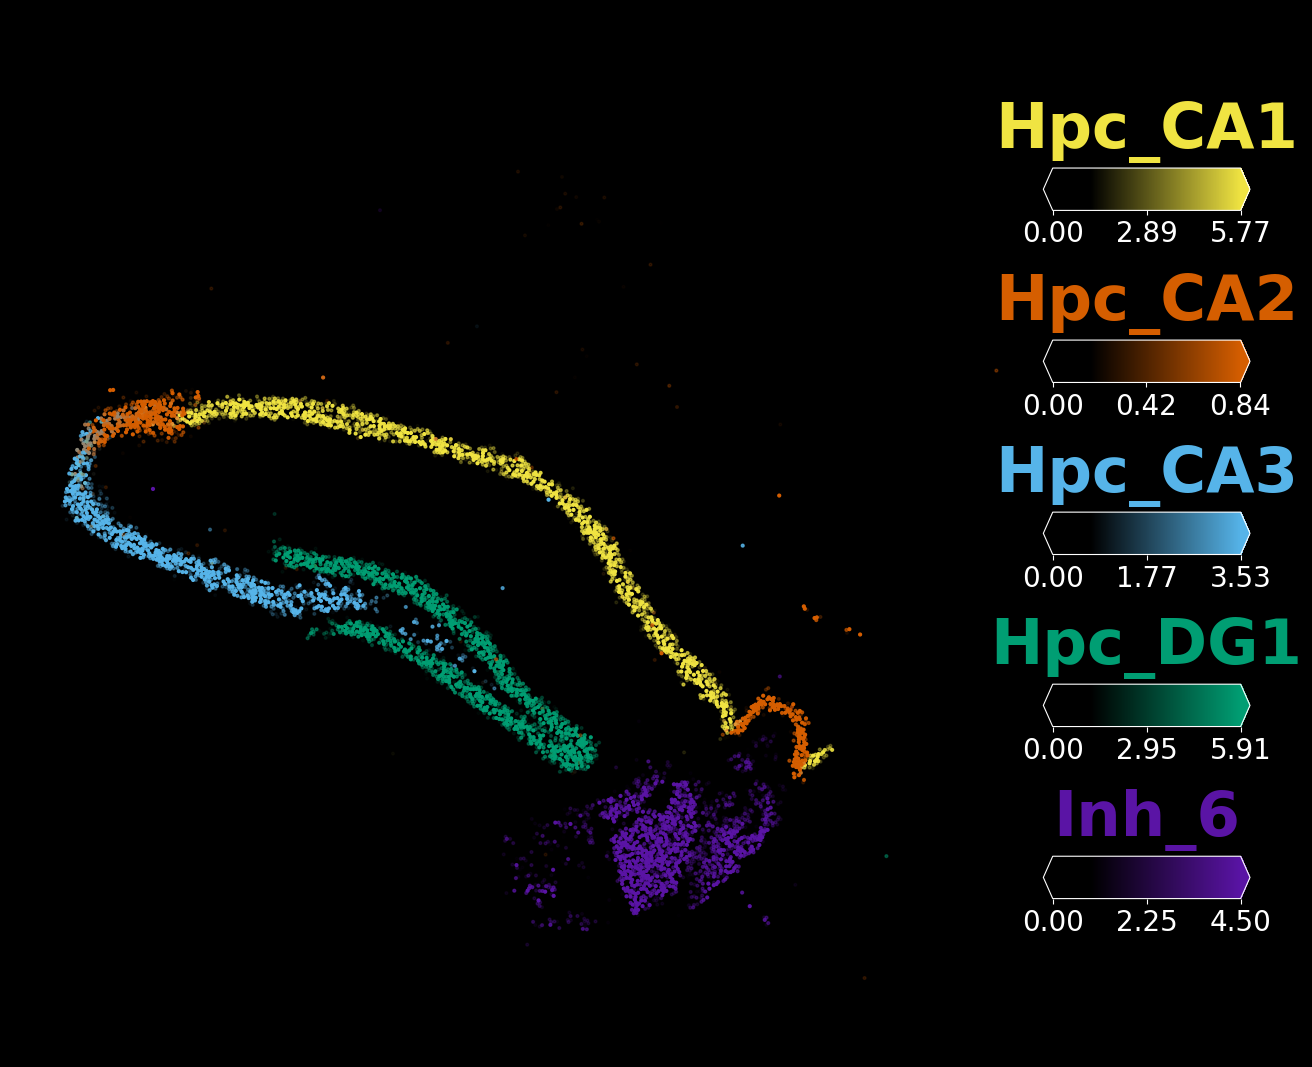

In [5]:
from cell2location.plt.mapping_video import plot_spatial

slide = adata_vis

# select up to 6 clusters 
sel_clust = ['Ext_Hpc_CA1', 'Ext_Hpc_CA2', 'Ext_Hpc_CA3', 'Ext_Hpc_DG1', 'Inh_6']
sel_clust_lab = ['Hpc_CA1', 'Hpc_CA2', 'Hpc_CA3', 'Hpc_DG1', 'Inh_6']
sel_clust_col = ['' + str(i) for i in sel_clust]

#crop_x, crop_y = get_crop_coord(slide)

matplotlib.rc_file_defaults()
rcParams['pdf.fonttype'] = 42 # enables correct plotting of text
with matplotlib.rc_context({"figure.figsize": (16,16)}):

    fig = plot_spatial(slide.obs[sel_clust_col], 
                  coords=slide.obsm['spatial'], 
                  show_img=False, img_alpha=1,
                  max_color_quantile=0.99, #reorder_cmap=[0,4],
              #img=list(slide.uns['spatial'].values())[0]['images']['hires'],
                  circle_diameter=2, alpha_scaling=1, labels=sel_clust_lab, 
                 style='dark_background', # fast dark_background
              #crop_x=crop_x, crop_y=crop_y,
                       colorbar_position='right',
                     colorbar_label_kw={'size': 45, 'weight': 'bold', 'y': 1.29},
                     colorbar_shape={'vertical_gaps': 2, 'horizontal_gaps': 0, 
                                     'width': 0.2, 'height': 0.35},
                     colorbar_tick_size=20,
                )
    fig.savefig(f'{save_path}Fig2H_HPC_multicell_maps.pdf',
                bbox_inches='tight', facecolor='black')

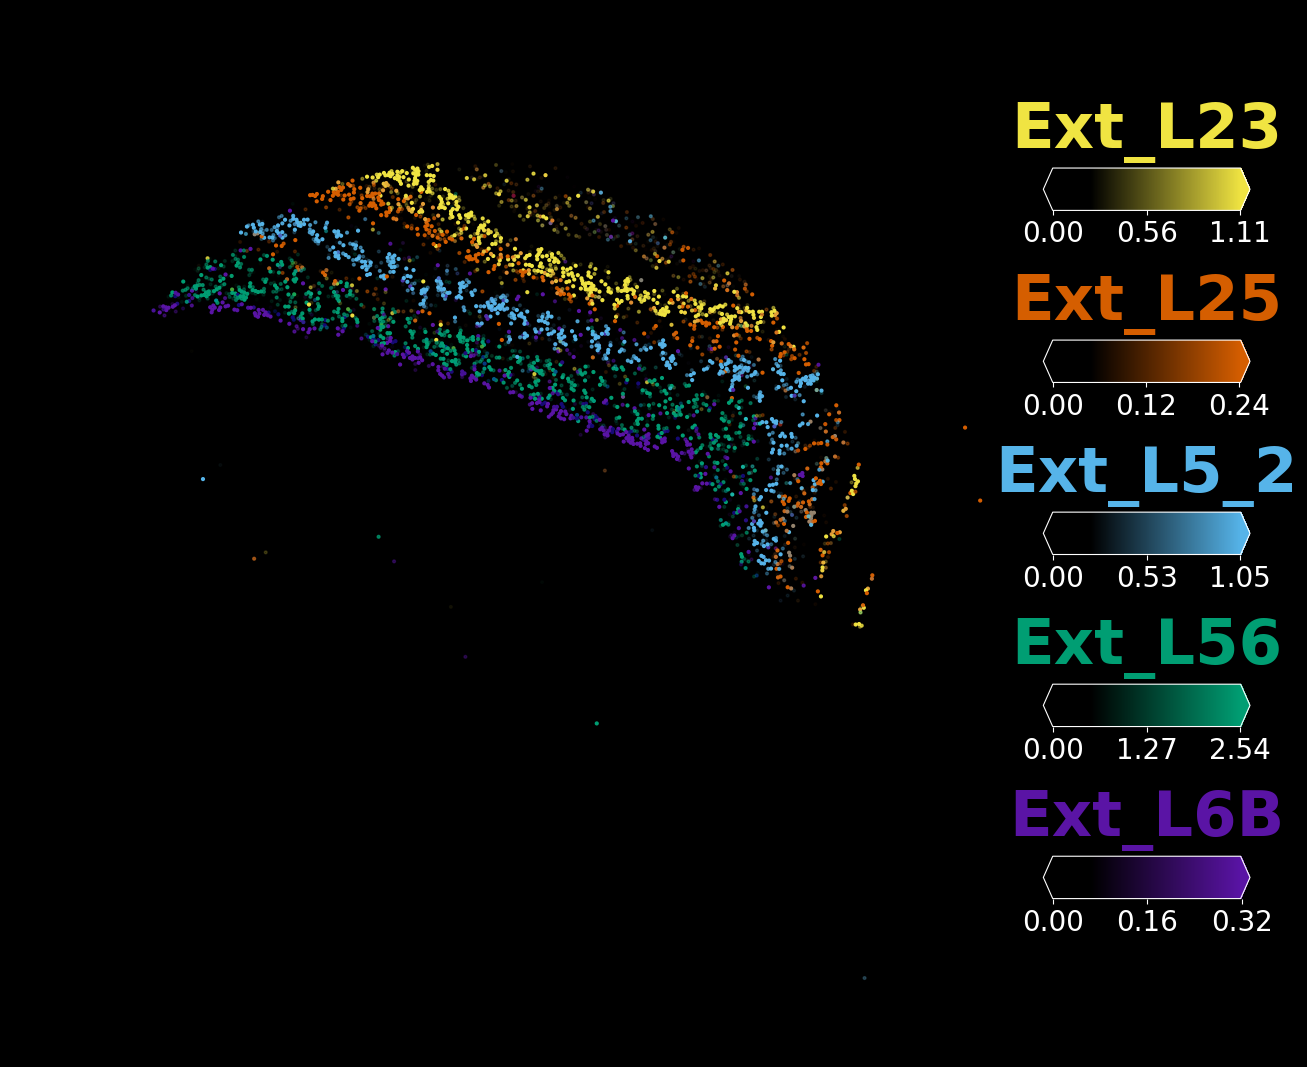

In [6]:
from cell2location.plt.mapping_video import plot_spatial

slide = adata_vis

# select up to 6 clusters 
sel_clust = ['Ext_L23', 'Ext_L25', 'Ext_L5_2', 'Ext_L56', 'Ext_L6B']
sel_clust_col = ['' + str(i) for i in sel_clust]

#crop_x, crop_y = get_crop_coord(slide)

matplotlib.rc_file_defaults()
rcParams['pdf.fonttype'] = 42 # enables correct plotting of text
with matplotlib.rc_context({"figure.figsize": (16,16)}):

    fig = plot_spatial(slide.obs[sel_clust_col], 
                  coords=slide.obsm['spatial'], 
                  show_img=False, img_alpha=1,
                  max_color_quantile=0.99, #reorder_cmap=[0,4],
              #img=list(slide.uns['spatial'].values())[0]['images']['hires'],
                  circle_diameter=2, alpha_scaling=1, labels=sel_clust, 
                 style='dark_background', # fast dark_background
              #crop_x=crop_x, crop_y=crop_y,
                       colorbar_position='right',
                     colorbar_label_kw={'size': 45, 'weight': 'bold', 'y': 1.29},
                     colorbar_shape={'vertical_gaps': 2, 'horizontal_gaps': 0, 
                                     'width': 0.2, 'height': 0.35},
                     colorbar_tick_size=20,
                )
    fig.savefig(f'{save_path}Fig2H_Ext_L_multicell_maps.pdf',
                bbox_inches='tight', facecolor='black')

### Fig 2H Supplementary Inh neurones <a class="anchor" id="Fig2H_suppl"></a> 

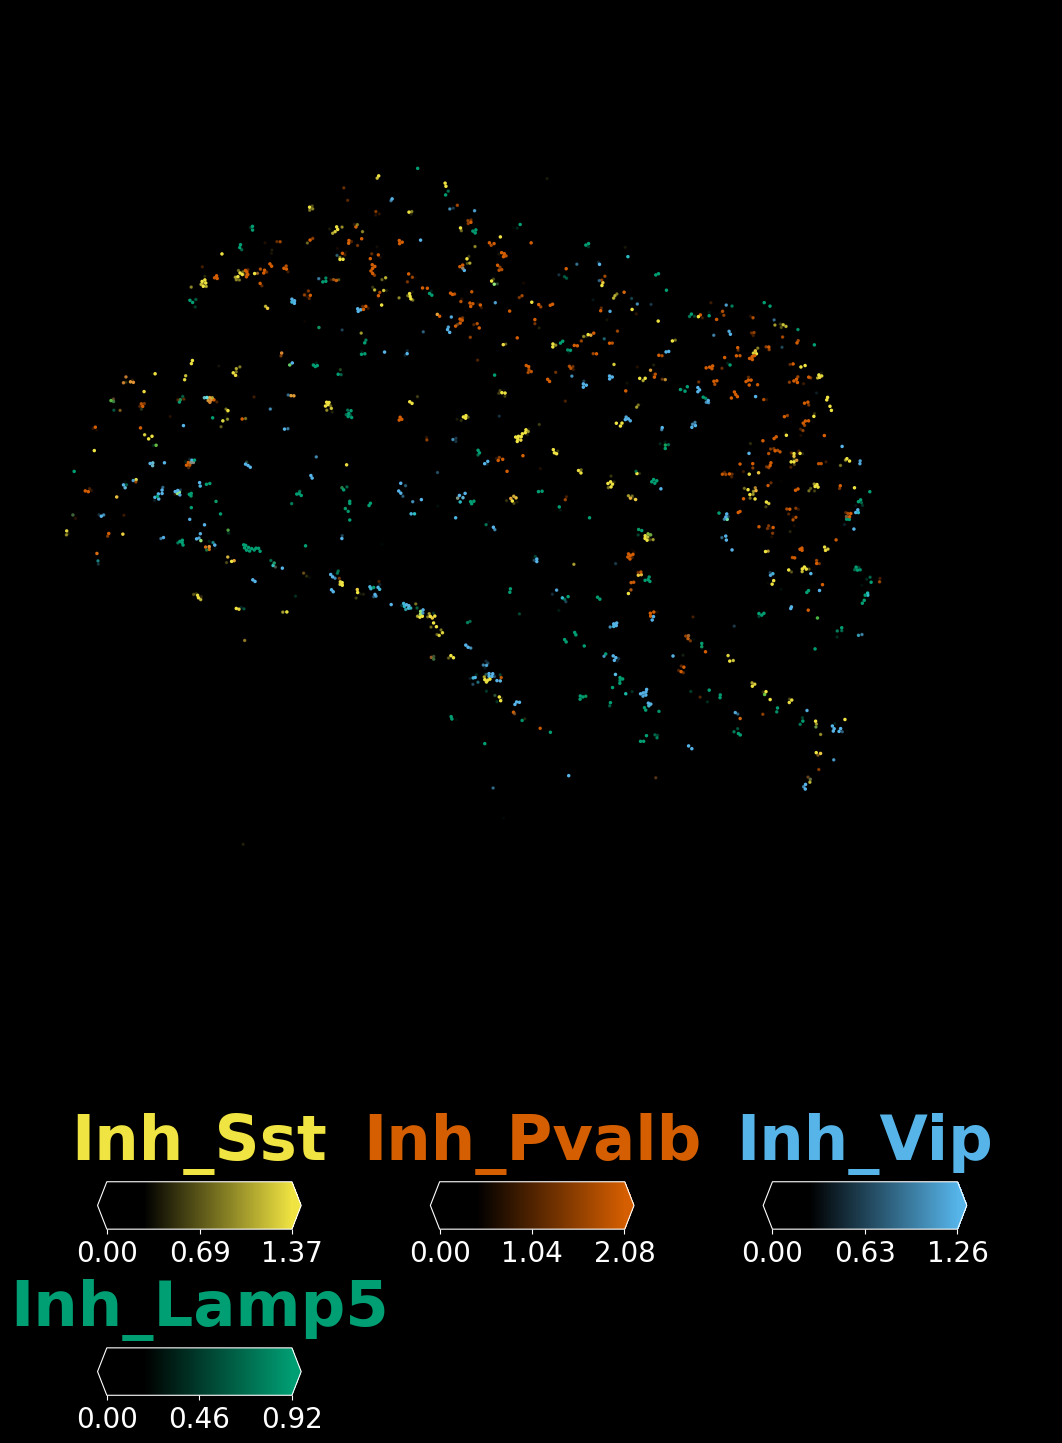

In [7]:
from cell2location.plt.mapping_video import plot_spatial

slide = adata_vis

# select up to 6 clusters 
sel_clust = ['Inh_Sst', 'Inh_Pvalb', 'Inh_Vip', 'Inh_Lamp5']
sel_clust_col = ['' + str(i) for i in sel_clust]

#crop_x, crop_y = get_crop_coord(slide)

matplotlib.rc_file_defaults()
rcParams['pdf.fonttype'] = 42 # enables correct plotting of text
with matplotlib.rc_context({"figure.figsize": (15,18)}):

    fig = plot_spatial(slide.obs[sel_clust_col], 
                  coords=slide.obsm['spatial'], 
                  show_img=False, img_alpha=1,
                  max_color_quantile=0.995, #reorder_cmap=[0,4],
              #img=list(slide.uns['spatial'].values())[0]['images']['hires'],
                  circle_diameter=1.5, alpha_scaling=1, labels=sel_clust, 
                 style='dark_background', # fast dark_background
              #crop_x=crop_x, crop_y=crop_y,
                 colorbar_label_kw={'size': 45, 'weight': 'bold', 'y': 1.29},
                 colorbar_shape={'vertical_gaps': 0.31, 'horizontal_gaps': 1, 
                                 'width': 3.5, 'height': 0.045},
                 colorbar_tick_size=20,
                )
    fig.savefig(f'{save_path}Fig2H_Inh_multicell_maps.pdf',
                bbox_inches='tight', facecolor='black')

### Fig 3C slide seq supplementary <a class="anchor" id="Fig3C"></a> 

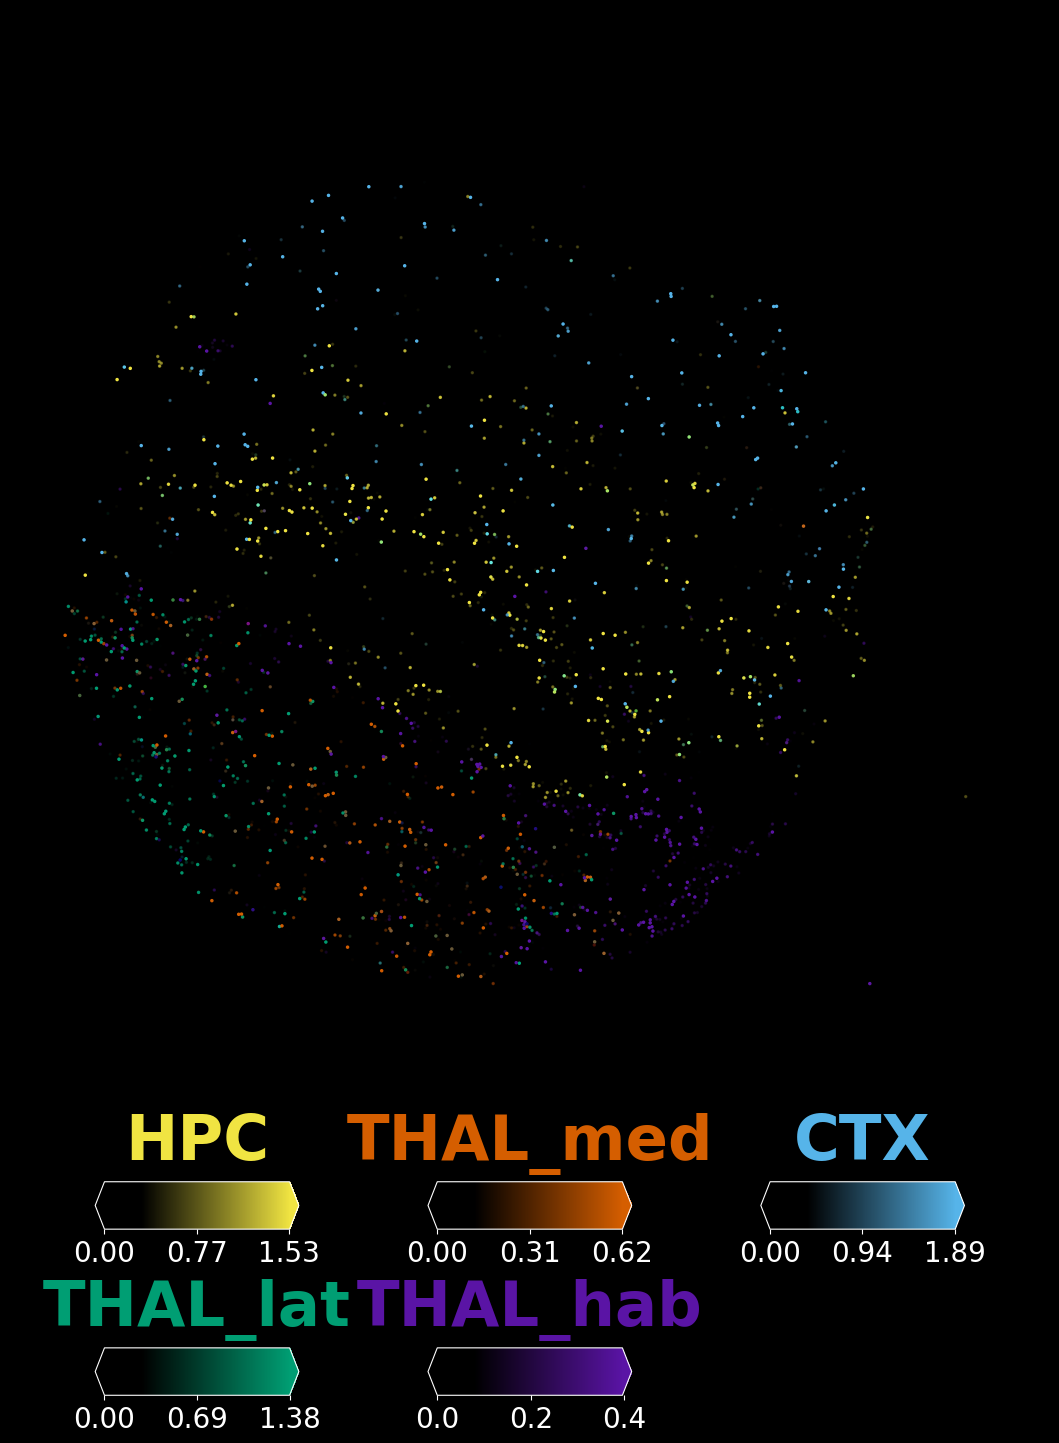

In [8]:
from cell2location.plt.mapping_video import plot_spatial

slide = adata_vis

# select up to 6 clusters 
sel_clust = ['Astro_HPC','Astro_THAL_med','Astro_CTX','Astro_THAL_lat', 'Astro_THAL_hab']
sel_clust_lab = ['HPC','THAL_med','CTX','THAL_lat', 'THAL_hab']
sel_clust_col = ['' + str(i) for i in sel_clust]

#crop_x, crop_y = get_crop_coord(slide)

matplotlib.rc_file_defaults()
rcParams['pdf.fonttype'] = 42 # enables correct plotting of text
with matplotlib.rc_context({"figure.figsize": (15,18)}):

    fig = plot_spatial(slide.obs[sel_clust_col], 
                  coords=slide.obsm['spatial'], 
                  show_img=False, img_alpha=1,
                  max_color_quantile=0.997, #reorder_cmap=[0,4],
              #img=list(slide.uns['spatial'].values())[0]['images']['hires'],
                  circle_diameter=1.5, alpha_scaling=1, labels=sel_clust_lab, 
                 style='dark_background', # fast dark_background
              #crop_x=crop_x, crop_y=crop_y,
                 colorbar_label_kw={'size': 45, 'weight': 'bold', 'y': 1.29},
                 colorbar_shape={'vertical_gaps': 0.31, 'horizontal_gaps': 1, 
                                 'width': 3.5, 'height': 0.045},
                 colorbar_tick_size=20,
                )
    fig.savefig(f'{save_path}Fig2H_Astro_multicell_maps.pdf',
                bbox_inches='tight', facecolor='black')

Modules and their versions used for this analysis

In [9]:
import sys
for module in sys.modules:
    try:
        print(module,sys.modules[module].__version__)
    except:
        try:
            if  type(sys.modules[module].version) is str:
                print(module,sys.modules[module].version)
            else:
                print(module,sys.modules[module].version())
        except:
            try:
                print(module,sys.modules[module].VERSION)
            except:
                pass

sys 3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 16:07:37) 
[GCC 9.3.0]
ipykernel 5.5.3
ipykernel._version 5.5.3
json 2.0.9
re 2.2.1
IPython 7.22.0
IPython.core.release 7.22.0
logging 0.5.1.2
zlib 1.0
traitlets 5.0.5
traitlets._version 5.0.5
argparse 1.1
ipython_genutils 0.2.0
ipython_genutils._version 0.2.0
platform 1.0.8
IPython.core.crashhandler 7.22.0
pygments 2.8.1
pexpect 4.8.0
ptyprocess 0.7.0
decorator 5.0.6
pickleshare 0.7.5
backcall 0.2.0
sqlite3 2.6.0
sqlite3.dbapi2 2.6.0
_sqlite3 2.6.0
prompt_toolkit 3.0.18
wcwidth 0.2.5
jedi 0.18.0
parso 0.8.2
colorama 0.4.4
ctypes 1.1.0
_ctypes 1.1.0
IPython.core.magics.code 7.22.0
urllib.request 3.7
jupyter_client 6.1.12
jupyter_client._version 6.1.12
zmq 22.0.3
zmq.backend.cython 40304
zmq.backend.cython.constants 40304
zmq.sugar 22.0.3
zmq.sugar.constants 40304
zmq.sugar.version 22.0.3
jupyter_core 4.7.1
jupyter_core.version 4.7.1
tornado 6.1
_curses b'2.2'
dateutil 2.8.1
dateutil._version 2.8.1
six 1.15.0
decimal 1.70
_de